## Initialization

In [1]:
import keras
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

## Data Loading-Train Test Splitting

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target
label = np.zeros((len(y), 2))
label[np.where(y == 1), 1] = 1
label[np.where(y == 0), 0] = 1
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.3, shuffle=False)

## Normalization

In [3]:
scaler = StandardScaler().fit(X_train)
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

## Modeling - AutoEncoder

In [4]:
input_x = keras.Input(shape=(X_train.shape[1],))
encoder = keras.layers.Dense(7, activation='sigmoid')(input_x)
model_encoder = keras.Model(input_x, encoder)
decoder = keras.layers.Dense(X_train.shape[1], activation='linear')(encoder)
model = keras.Model(input_x, decoder)
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 7)                 217       
                                                                 
 dense_1 (Dense)             (None, 30)                240       
                                                                 
Total params: 457 (1.79 KB)
Trainable params: 457 (1.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Classification

Epoch 1/60



13/13 [==============================] - 1s 18ms/step - loss: 0.7417 - accuracy: 0.4347 - val_loss: 0.7817 - val_accuracy: 0.2281
Epoch 2/60
13/13 [==============================] - 0s 6ms/step - loss: 0.7241 - accuracy: 0.4347 - val_loss: 0.7534 - val_accuracy: 0.2281
Epoch 3/60
13/13 [==============================] - 0s 4ms/step - loss: 0.7084 - accuracy: 0.4347 - val_loss: 0.7291 - val_accuracy: 0.2398
Epoch 4/60
13/13 [==============================] - 0s 5ms/step - loss: 0.6951 - accuracy: 0.4472 - val_loss: 0.7074 - val_accuracy: 0.3801
Epoch 5/60
13/13 [==============================] - 0s 5ms/step - loss: 0.6845 - accuracy: 0.6583 - val_loss: 0.6854 - val_accuracy: 0.7076
Epoch 6/60
13/13 [==============================] - 0s 5ms/step - loss: 0.6742 - accuracy: 0.8442 - val_loss: 0.6718 - val_accuracy: 0.8421
Epoch 7/60
13/13 [==============================] - 0s 7ms/step - loss: 0.6670 - accuracy: 0.8744 - val_loss: 0.6572 - val_accuracy: 0.9123
Epoch 8/60
13/13 [============

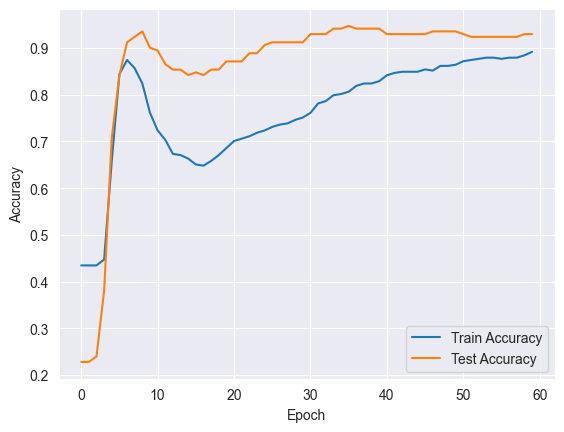

In [5]:
transformed_X_train = model_encoder(X_train)
transformed_X_test = model_encoder(X_test)
classifier = keras.Sequential()
classifier.add(keras.layers.Dense(10, input_shape=(transformed_X_train.shape[1],), activation='sigmoid'))
classifier.add(keras.layers.Dense(2, activation='sigmoid'))
optimizer = keras.optimizers.Adam(lr=0.01)
classifier.compile(loss='binary_crossentropy', optimizer=optimizer, metrics='accuracy')
history = classifier.fit(transformed_X_train, y_train, validation_data=(transformed_X_test, y_test), epochs=60)
# Plot accuracy during training
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [6]:
y_pre = classifier.predict(transformed_X_test)
y_pre = np.argmax(y_pre, axis=1)
confusion_matrix(y_pre , np.argmax(y_test, axis=1))

6/6 [==============================] - 0s 1ms/step


array([[ 32,   5],
       [  7, 127]], dtype=int64)